In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data = df[["Alcohol","Magnesium"]]
data.head()

,Alcohol,Magnesium
0,14.23,127
1,13.20,100
2,13.16,101
3,14.37,113
4,13.24,118


In [10]:
scale1 = MinMaxScaler()
scale2 = MinMaxScaler()

scale1.fit(data[["Alcohol"]])
scale2.fit(data[["Magnesium"]])

data["Alcohol"] = scale1.transform(data[["Alcohol"]])
data["Magnesium"] = scale2.transform(data[["Magnesium"]])
 
data.head()

/tmp/ipykernel_42/961785206.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Alcohol"] = scale1.transform(data[["Alcohol"]])
/tmp/ipykernel_42/961785206.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Magnesium"] = scale2.transform(data[["Magnesium"]])


,Alcohol,Magnesium
0,0.842105,0.619565
1,0.571053,0.326087
2,0.560526,0.336957
3,0.878947,0.467391
4,0.581579,0.521739


Text(0, 0.5, 'Magnesium')

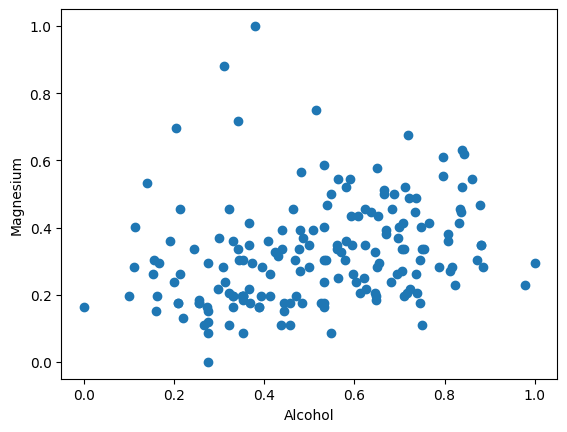

In [11]:
plt.scatter(data["Alcohol"], data["Magnesium"])
plt.xlabel("Alcohol")
plt.ylabel("Magnesium")

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data)
data["cluster"] = y_predicted
#data
km.cluster_centers_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_42/2362544386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cluster"] = y_predicted


array([[0.33658846, 0.23886852],
       [0.71583333, 0.3048913 ],
       [0.61203008, 0.55496894]])

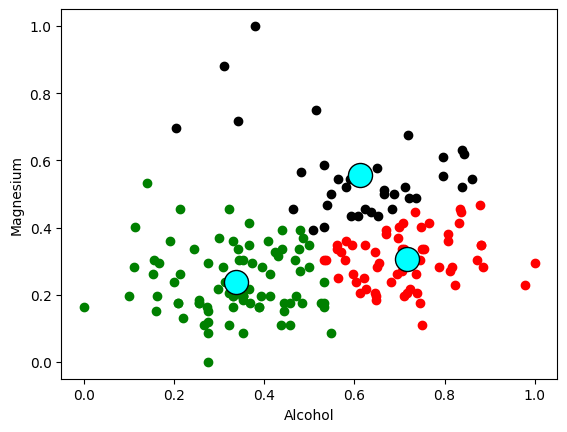

In [13]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

plt.scatter(data1["Alcohol"], data1["Magnesium"], color='green')
plt.scatter(data2["Alcohol"], data2["Magnesium"],color='red')
plt.scatter(data3["Alcohol"], data3["Magnesium"],color='black')
plt.xlabel("Alcohol")
plt.ylabel("Magnesium")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='o', s=300, color="cyan", edgecolors="black")
plt.show()

In [15]:
#model Evalution 
from sklearn.metrics import silhouette_score

# Assuming 'data' is your DataFrame with cluster assignments
silhouette_avg = silhouette_score(data[['Alcohol', 'Magnesium']], data['cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.40892354593000524


hierarchical based Cluster

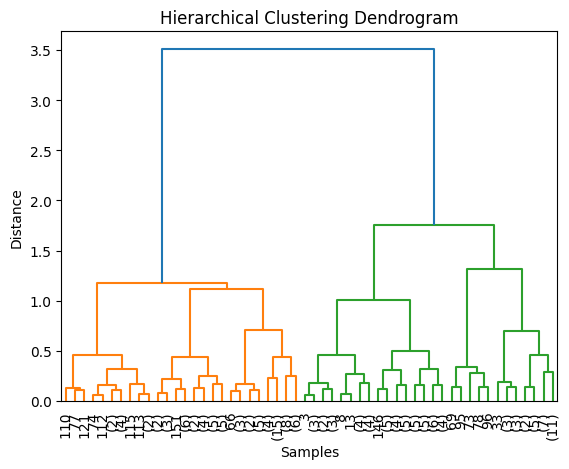

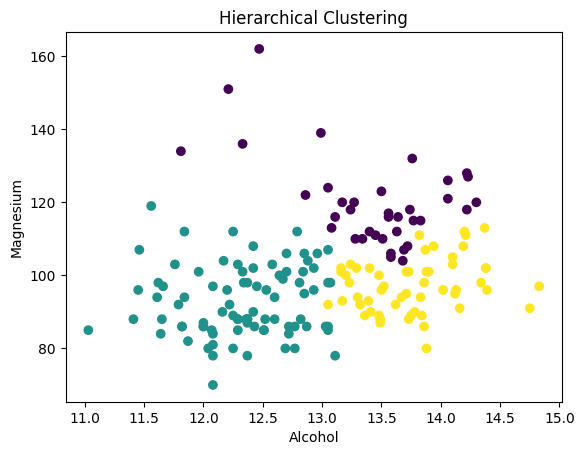

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the wine dataset
df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')

# Select features for clustering
data = df[["Alcohol", "Magnesium"]]

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')
dendrogram(linkage_matrix, p=5, truncate_mode='level', color_threshold=None, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

plt.scatter(data["Alcohol"], data["Magnesium"], c=y_predicted, cmap='viridis')
plt.xlabel("Alcohol")
plt.ylabel("Magnesium")
plt.title("Hierarchical Clustering")
plt.show()

/tmp/ipykernel_42/984471303.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cluster"] = cluster_labels


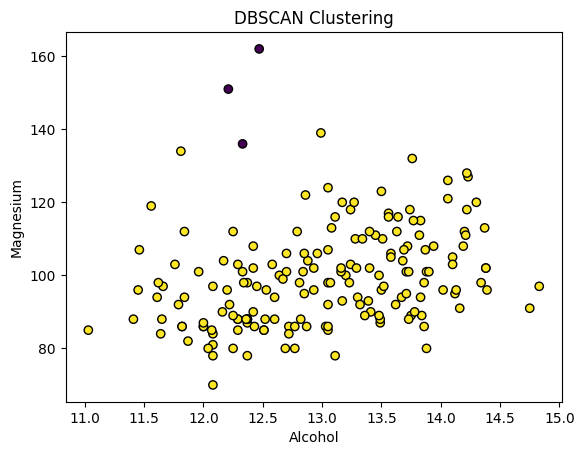

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

# Load the wine dataset
df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')

# Select features for clustering
data = df[["Alcohol", "Magnesium"]]

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Adjust these parameters
cluster_labels = dbscan.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
data["cluster"] = cluster_labels



# Visualize the clusters
plt.scatter(data["Alcohol"], data["Magnesium"], c=data["cluster"], cmap='viridis', edgecolors='k')
plt.xlabel("Alcohol")
plt.ylabel("Magnesium")
plt.title("DBSCAN Clustering")
plt.show()
